# EXPLORATORY DATA ANALYSIS: HABERMAN DATASET
### A. DATA INFORMATION
### B. OBJECTIVE
### C. DATASET CONFIGURATION
       1. ENVIRONMENT LOADING
       2. LOADING THE DATASET
### D. HIGH LEVEL STATISTICS OF THE DATASET
       1. NUMBER OF POINTS
       2. NUMBER OF FEATURES
       3. NUMBER OF CLASSES
       4. DATAPOINTS PER NUMBER OF CLASS
       5. MEAN, MAD & STD. DEVIATION
### E. UNIVARIATE ANALYSIS
       1. HISTOGRAM
       2. PDF & CDF
       3. BOX PLOT & WHISKERS
       4. VIOLIN PLOT
       5. CONTOUR PLOT
### F. BI-VARIATE ANALYSIS
       1. PAIR PLOT
       2. SCATTER PLOT
### G. ALL OBSERVATIONS
       
       
       

# A. DATASET INFORMATION

**About the Dataset** :- The Haberman's Survival Dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicagos Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 

**Dataset source** :- https://www.kaggle.com/gilsousa/habermans-survival-data-set/data

**Attribute Information:**

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

# B. OBJECTIVE

**To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes**

# C. DATASET CONFIGURATION

### 1. ENVIRONMENT SETUP

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') ## ignore all the warnings
from statsmodels import robust ## for Median Absolute Deviation

### 2. LOADING THE DATASET

In [2]:
haberman=pd.read_csv("haberman.csv")

# D. HIGH LEVEL STATISTICS OF THE DATASET

In [3]:
# haberman.describe()
print(haberman.head(15))

    age  operation_year  axil_nodes  survival_status
0    30              64           1                1
1    30              62           3                1
2    30              65           0                1
3    31              59           2                1
4    31              65           4                1
5    33              58          10                1
6    33              60           0                1
7    34              59           0                2
8    34              66           9                2
9    34              58          30                1
10   34              60           1                1
11   34              61          10                1
12   34              67           7                1
13   34              60           0                1
14   35              64          13                1


### 1. NUMBER OF POINTS

In [4]:
print (haberman.shape)

(306, 4)


In [5]:
haberman["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [6]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
operation_year     306 non-null int64
axil_nodes         306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [7]:
# Class Label "survival_status" are now to labelled as {1:"yes",2:"no"} stating "yes" as survived and "no" as Dead Not Survived
haberman['survival_status'] = haberman['survival_status'].map({1:"yes", 2:"no"})
print(haberman.head(15)) ## we are displaying 1st 15 lines

    age  operation_year  axil_nodes survival_status
0    30              64           1             yes
1    30              62           3             yes
2    30              65           0             yes
3    31              59           2             yes
4    31              65           4             yes
5    33              58          10             yes
6    33              60           0             yes
7    34              59           0              no
8    34              66           9              no
9    34              58          30             yes
10   34              60           1             yes
11   34              61          10             yes
12   34              67           7             yes
13   34              60           0             yes
14   35              64          13             yes


In [8]:
## CHECKING THE UPDATED SURVIVAL STATUS
haberman["survival_status"].value_counts()

yes    225
no      81
Name: survival_status, dtype: int64

In [9]:
## CHECKING THE UPDATED INFO ABOUT THE CHANGED DATATYPE OF OUR CLASS LABEL
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
operation_year     306 non-null int64
axil_nodes         306 non-null int64
survival_status    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


**OBSERVATION**
1. Dataset is UNBALANCED but complete as no values are missing
2. Our CLASS LABEL ie survival_status is INTERGER and needs to converted to valid CATEGORICAL datatype
3. Class Label "survival_status" are now to labelled as {1:"yes",2:"no"} stating "yes" as survived and "no" as Dead Not Survived

### 2. NUMBER OF FEATURES

In [10]:
print (haberman.columns)

Index(['age', 'operation_year', 'axil_nodes', 'survival_status'], dtype='object')


In [11]:
## Last column is our CATEGORY that is the DEPENDENT VARIABLE, therefore it is not considered as a feature
print (haberman.columns[:-1])

Index(['age', 'operation_year', 'axil_nodes'], dtype='object')


### 3. NUMBER OF CLASSES

In [12]:
print(haberman["survival_status"].unique())

['yes' 'no']


### 4. DATAPOINTS PER NUMBER OF CLASS

In [13]:
print(haberman.groupby("survival_status").count())

                 age  operation_year  axil_nodes
survival_status                                 
no                81              81          81
yes              225             225         225


### 5. MEAN, MAD & STD. DEVIATION

In [14]:
haberman_yes=haberman.loc[haberman["survival_status"]=="yes"]
haberman_no=haberman.loc[haberman["survival_status"]=="no"]

print("SURVIVAL_STATUS: YES , COUNT",haberman_yes["survival_status"].count()) 
print("hi")
print("VARIABLE       MEAN             MEDIAN    STD. DEVIATION        MAD")
print("age         ",np.mean(haberman_yes["age"]),"  ",np.median(haberman_yes["age"]),"  ",np.std(haberman_yes["age"]),"   ",robust.mad(haberman_yes["age"]))
print("opYear      ",np.mean(haberman_yes["operation_year"]),"  ",np.median(haberman_yes["operation_year"]),"  ",np.std(haberman_yes["operation_year"]),"   ",robust.mad(haberman_yes["operation_year"]))
print("axilnodes   ",np.mean(haberman_yes["axil_nodes"]),"  ",np.median(haberman_yes["axil_nodes"]),"  ",np.std(haberman_yes["axil_nodes"]),"   ",robust.mad(haberman_yes["axil_nodes"]))
print("\n")
# includeInDescribe=['ag','opYear','axilNodes']
perc=[.0,.25,.50,.75,.1]


print("SURVIVAL_STATUS: NO , COUNT",haberman_no["survival_status"].count())  
print("VARIABLE       MEAN             MEDIAN    STD. DEVIATION        MAD")
print("age         ",np.mean(haberman_no["age"]),"  ",np.median(haberman_no["age"]),"  ",np.std(haberman_no["age"]),"   ",robust.mad(haberman_no["age"]))
print("opYear      ",np.mean(haberman_no["operation_year"]),"  ",np.median(haberman_no["operation_year"]),"  ",np.std(haberman_no["operation_year"]),"  ",robust.mad(haberman_no["operation_year"]))
print("axilnodes   ",np.mean(haberman_no["axil_nodes"]),"   ",np.median(haberman_no["axil_nodes"]),"   ",np.std(haberman_no["axil_nodes"]),"   ",robust.mad(haberman_no["axil_nodes"]))
print("\n\n")

print("SURVIVAL STATUS: YES -> DESCRIBE")
print(haberman_yes.describe(percentiles=perc))
print("\n\n")
print("SURVIVAL STATUS: NO -> DESCRIBE")
print(haberman_no.describe(percentiles=perc))
# print(haberman.describe(percentiles=perc))


SURVIVAL_STATUS: YES , COUNT 225
hi
VARIABLE       MEAN             MEDIAN    STD. DEVIATION        MAD
age          52.01777777777778    52.0    10.98765547510051     13.343419966550417
opYear       62.86222222222222    63.0    3.2157452144021956     4.447806655516806
axilnodes    2.7911111111111113    0.0    5.857258449412131     0.0


SURVIVAL_STATUS: NO , COUNT 81
VARIABLE       MEAN             MEDIAN    STD. DEVIATION        MAD
age          53.67901234567901    53.0    10.10418219303131     11.860817748044816
opYear       62.82716049382716    63.0    3.3214236255207883    4.447806655516806
axilnodes    7.45679012345679     4.0     9.128776076761632     5.930408874022408



SURVIVAL STATUS: YES -> DESCRIBE
              age  operation_year  axil_nodes
count  225.000000      225.000000  225.000000
mean    52.017778       62.862222    2.791111
std     11.012154        3.222915    5.870318
min     30.000000       58.000000    0.000000
0%      30.000000       58.000000    0.000000
10

**OBSERVATION**

1. This is Binary Classification Problem, where we need to predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes
2. 50% of the Patients are below the age of 54.

# E. UNIVARIATE ANALYSIS


## 1. HISTOGRAM

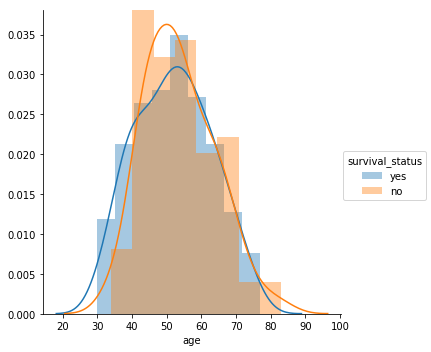

In [15]:
## PATIENT AGE
sns.FacetGrid(haberman,hue="survival_status",size=5)\
    .map(sns.distplot,"age")\
    .add_legend();

plt.show();

**OBSERVATION**

1. Patients with age range 40-60 have survived the most.

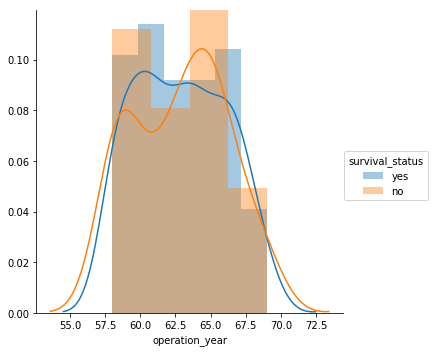

In [16]:
sns.FacetGrid(haberman,hue="survival_status",size=5)\
    .map(sns.distplot,"operation_year")\
    .add_legend();
plt.show()

**OBSERVATION**

1. Operation year having range (63-66) had highest successfull survival rate
2. Operation year 60 had highest un-successfull rate



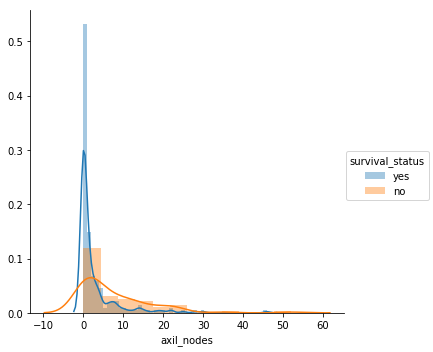

In [17]:
sns.FacetGrid(haberman,hue="survival_status",size=5)\
    .map(sns.distplot,"axil_nodes")\
    .add_legend();

plt.show()

**OBSERVATION**

1. As we can clearly see, axil node=0 has the highest Survival rate.

# 2. PDF & CDF

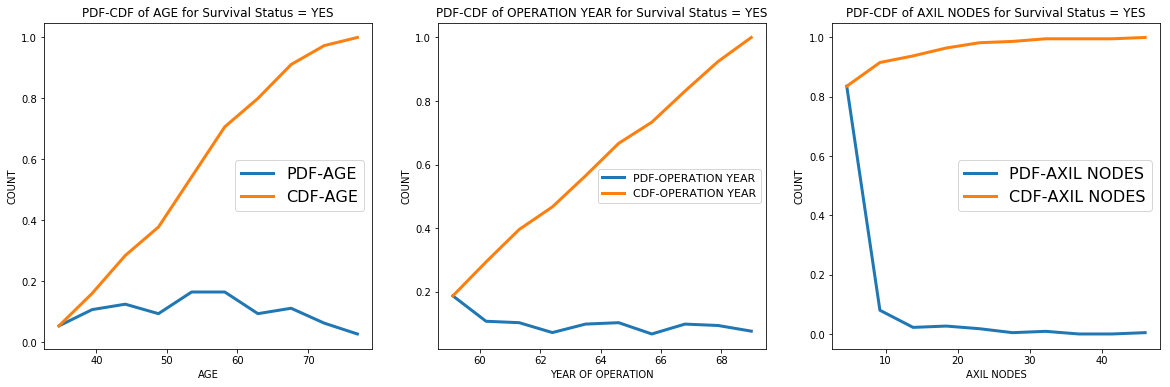

In [18]:
##haberman
plt.figure(figsize=(20,6))
plt.subplot(131) ##(1=no. of rows, 3= no. of columns, 1=1st figure,2,3,4 boxes)
counts,bin_edges=np.histogram(haberman_yes["age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('AGE')
plt.title('PDF-CDF of AGE for Survival Status = YES')
plt.legend(['PDF-AGE', 'CDF-AGE'], loc = 5,prop={'size': 16})

plt.subplot(132)
counts,bin_edges=np.histogram(haberman_yes["operation_year"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('YEAR OF OPERATION')
plt.title('PDF-CDF of OPERATION YEAR for Survival Status = YES')
plt.legend(['PDF-OPERATION YEAR', 'CDF-OPERATION YEAR'], loc = 5,prop={'size': 11})

plt.subplot(133)
counts,bin_edges=np.histogram(haberman_yes["axil_nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('AXIL NODES')
plt.title('PDF-CDF of AXIL NODES for Survival Status = YES')
plt.legend(['PDF-AXIL NODES', 'CDF-AXIL NODES'], loc = 5,prop={'size': 16})
plt.show()

## 3. BOX PLOT & WHISKERS

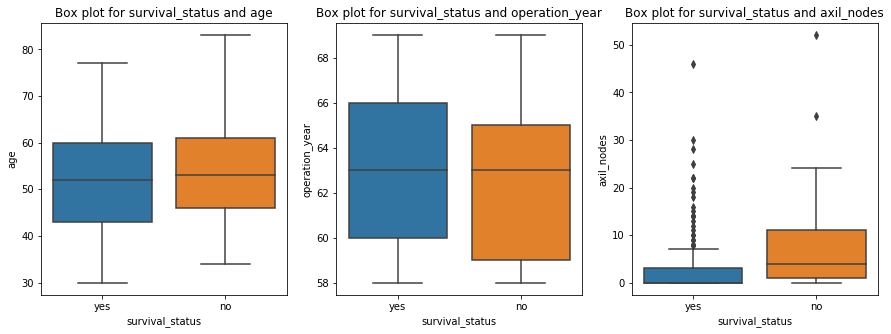

In [19]:
# Box plot takes a less space and visually represents the five number summary of the data points in a box. 
# The outliers are displayed as points outside the box.
# 1. Q1 - 1.5*IQR
# 2. Q1 (25th percentile)
# 3. Q2 (50th percentile or median)
# 4. Q3 (75th percentile)
# 5. Q3 + 1.5*IQR
# Inter Quartile Range = Q3 -Q1

figure, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    mystr="Box plot for survival_status and "+feature
    sns.boxplot( x='survival_status', y=feature, data=haberman, ax=axes[idx]).set_title(mystr)
plt.show()

**OBSERVATION**

1. From AXIL_NODE and SURVIVAL_STATUS, we can conclude that higher the axil_nodes, higher the chances of their death.

## 4. VIOLIN PLOT

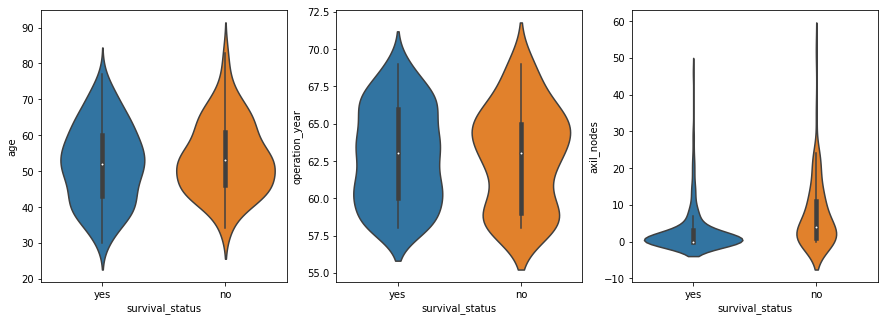

In [20]:
# A violin plot combines the benefits of BoxPlot and Univariate Histogram PDF plots 
#and simplifies them
# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
#     print(idx,feature)
    sns.violinplot( x='survival_status', y=feature, data=haberman, ax=axes[idx])
plt.show()

## 5.  CONTOUR PLOT

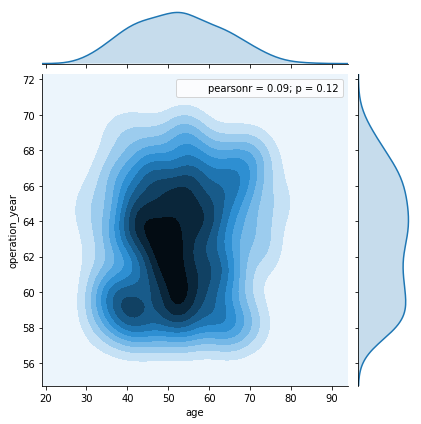

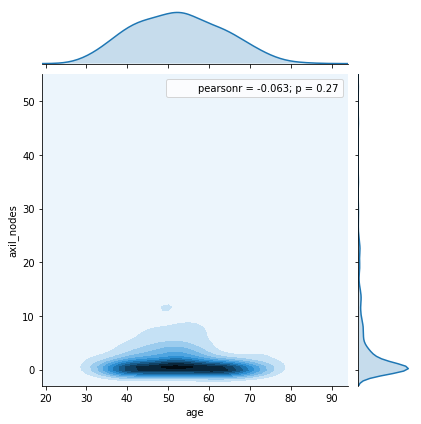

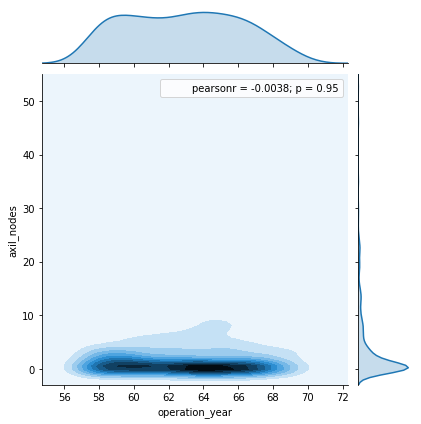

In [21]:
#2D Density plot, contors-plot
sns.jointplot(x="age",y="operation_year",data=haberman, kind="kde")
plt.show()

sns.jointplot(x="age",y="axil_nodes",data=haberman, kind="kde")
plt.show()

sns.jointplot(x="operation_year",y="axil_nodes",data=haberman, kind="kde")
plt.show()



# F. BI-VARIATE ANALYSIS


## 1. PAIR PLOTS

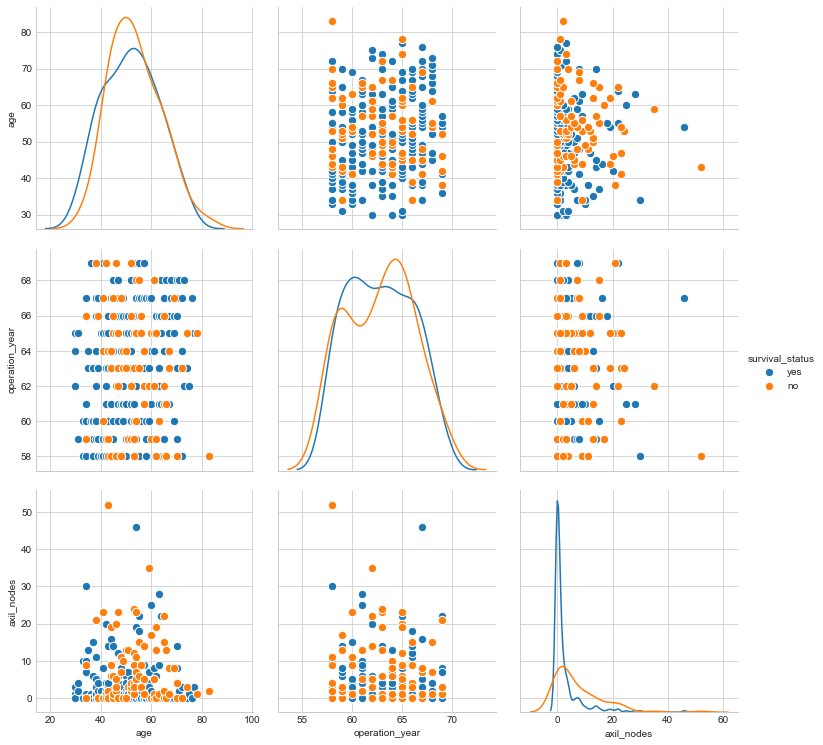

In [22]:
plt.close() ## close previous show()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="survival_status",vars=["age","operation_year","axil_nodes"],size=3.5,plot_kws=dict(s=70),diag_kind = 'kde')
plt.show()

**OBSERVATION**

As we can see all the above Pair Plots, we can say that they are not Linearly Separable.

## 2. SCATTER PLOTS

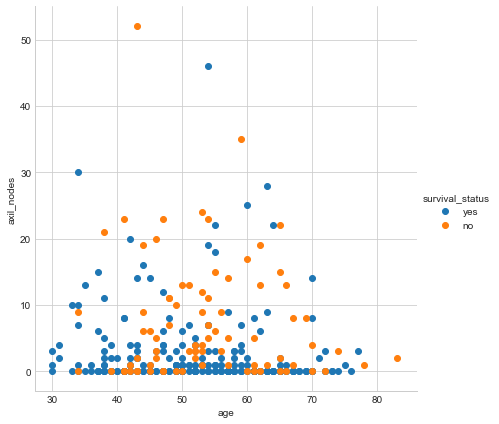

In [23]:
## AGE <> AXIL NODES
# haberman.plot(kind='scatter', x='age', y='axil_nodes') ;
# plt.show()

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", size=6) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.show();

**OBSERVATION**

1. Patients with Age < 40 and axil < 30 have higher chances of survival.
2. Patients with Age > 50 and Axil > 10 are more likely to die.

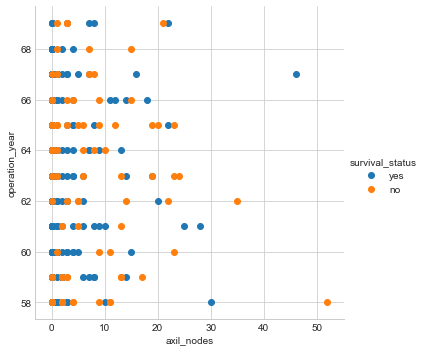

In [24]:
## AXIL NODES <> OPERATION YEAR
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(plt.scatter, "axil_nodes", "operation_year") \
   .add_legend();

plt.show();

**OBSERVATION**

1. People with axil nodes more than 50 have higher rate of non survival.

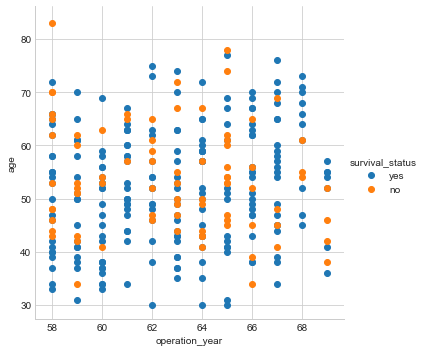

In [25]:
## AGE <> OPERATION YEAR
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(plt.scatter, "operation_year", "age") \
   .add_legend();
plt.show();

**OBSERVATION**

1. Operation year 60, 61 and 68 has more survival rate.

# G. ALL OBSERVATIONS
1. Dataset is UNBALANCED but complete as no values are missing
2. Our CLASS LABEL ie survival_status is INTERGER and needs to converted to valid CATEGORICAL datatype
3. Class Label "survival_status" are now to labelled as {1:"yes",2:"no"} stating "yes" as survived and "no" as Dead Not Survived.
4. This is Binary Classification Problem, where we need to predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes
5. 50% of the Patients are below the age of 54.
6. Operation year having range (63-66) had highest successfull survival rate
7. Operation year 60 had highest un-successfull rate. Patients with age range 40-60 have survived the most.
8. As we can clearly see, axil node=0 has the highest Survival rate.
9. From AXIL_NODE and SURVIVAL_STATUS, we can conclude that higher the axil_nodes, higher the chances of their death.
10. As we can see all the above Pair Plots, we can say that they are not Linearly Separable.
11. Patients with Age < 40 and axil < 30 have higher chances of survival.
12. Patients with Age > 50 and Axil > 10 are more likely to die
13. People with axil nodes more than 50 have higher rate of non survival.
14. Operation year 60, 61 and 68 has more survival rate.

